In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-67.05302054715523 -15.967244990085618
58.131262743780326 102.13212889098156
87.82178860371351 -19.224681451958418
47.616637751227955 109.60095800232432
-1.451138858455323 124.301068506945
-66.24376835421975 -30.16967517360507
-83.46512741798514 -93.6481729861966
-25.54910725164426 87.52201379222157
86.50388868641198 -137.23484355152644
-51.94324422906901 143.61488410623497
80.77640819269527 -107.04287587797528
62.441009074678874 26.94316448741506
33.638768121314655 99.33180615010053
25.168484119739276 24.268284375273367
20.871111502563622 -106.97566826317009
36.284540941525734 -56.69218755219548
16.888849769821178 21.050864181906007
5.507498027716139 15.425307585811879
10.770738186483769 -31.299275752147878
-51.60385152086621 -74.203849450508
86.10597029389609 90.82285526776985
-66.50230177477033 -83.99105501422054
85.65423807946698 177.2335206976544
-12.467640592641146 -123.14947100595683
11.023563427420854 103.51056425017322
-81.80053302481542 -28.372369816745874
21.454098947281963 

-20.686436474864465 -97.92205203664653
68.86606188727569 170.4186660340784
89.70654595990197 -136.9092664621866
-72.16262018627295 -96.4906757145539
-82.68175060614833 -12.545003300167224
37.49832623979282 -105.96268402081648
-44.33480394643678 62.94450826844243
-89.13775859885043 49.21500325960247
-39.49469741655956 59.430816212969376
2.547910904651502 -55.68108380605817
-14.362176590373565 -96.1284715819023
55.96202325203842 -114.79862689030577
8.730831944981816 -52.80706047950295
-1.230563194355483 -121.35846074954075
-79.855532286785 9.37493318817232
73.54915098153768 -99.56552416713933
15.001817095383402 -146.5458079878001
-55.337032573718496 -148.6883923714261
-57.73590811318507 -115.761358270376
77.06211726015397 134.62928030067798
43.512951903716015 23.26537432414858
20.389308587125996 -29.43755582062184
-56.07102215966615 82.32866513777293
-3.0541682721238033 105.13780612387745
26.82787772078622 -88.1991075289674
-26.518215756892772 -142.93779970662365
-31.84311662011452 110.4

In [5]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
cities

['cape town',
 'ust-ilimsk',
 'illoqqortoormiut',
 'darhan',
 'luwuk',
 'mar del plata',
 'punta arenas',
 'carnarvon',
 'tuktoyaktuk',
 'new norfolk',
 'yellowknife',
 'mikkeli',
 'xining',
 'jalu',
 'bucerias',
 'saint george',
 'faya',
 'bouar',
 'sao filipe',
 'dikson',
 'leningradskiy',
 'rikitea',
 'kampot',
 'ushuaia',
 'butaritari',
 'hithadhoo',
 'puerto madryn',
 'muzhi',
 'chokurdakh',
 'falmouth',
 'batemans bay',
 'bambous virieux',
 'cherskiy',
 'makakilo city',
 'limbe',
 'kapaa',
 'hobart',
 'albany',
 'skibotn',
 'kodiak',
 'poronaysk',
 'kavaratti',
 'ribeira brava',
 'thompson',
 'srednekolymsk',
 'broken hill',
 'lagoa',
 'nemuro',
 'vite',
 'taolanaro',
 'jieshi',
 'kaitangata',
 'hamilton',
 'east london',
 'arraial do cabo',
 'saleaula',
 'pochutla',
 'chuy',
 'katsuura',
 'ribeira grande',
 'jamestown',
 'hilo',
 'narsaq',
 'haimen',
 'san patricio',
 'taburi',
 'busselton',
 'oussouye',
 'vaini',
 'lima',
 'kailua',
 'kautokeino',
 'trincomalee',
 'peleduy',
 '

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2159290164a4a30ecef5b2b6e3d5aba5


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 #Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | ust-ilimsk
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | darhan
Processing Record 5 of Set 1 | luwuk
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | mikkeli
Processing Record 13 of Set 1 | xining
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | bucerias
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | faya
Processing Record 18 of Set 1 | bouar
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | leningradskiy
Processing Record 22 of Set 1 | rikitea


Processing Record 34 of Set 4 | gold coast
Processing Record 35 of Set 4 | saint-philippe
Processing Record 36 of Set 4 | neryungri
Processing Record 37 of Set 4 | whitehorse
Processing Record 38 of Set 4 | barbar
City not found. Skipping...
Processing Record 39 of Set 4 | tatawin
Processing Record 40 of Set 4 | diego de almagro
Processing Record 41 of Set 4 | itoman
Processing Record 42 of Set 4 | oistins
Processing Record 43 of Set 4 | nyagan
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | manjacaze
Processing Record 46 of Set 4 | maralal
Processing Record 47 of Set 4 | husavik
Processing Record 48 of Set 4 | mitchell
Processing Record 49 of Set 4 | reitz
Processing Record 50 of Set 4 | castro
Processing Record 1 of Set 5 | kamiiso
Processing Record 2 of Set 5 | viedma
Processing Record 3 of Set 5 | safaga
Processing Record 4 of Set 5 | waterloo
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set

Processing Record 22 of Set 8 | wagar
Processing Record 23 of Set 8 | necochea
Processing Record 24 of Set 8 | kununurra
Processing Record 25 of Set 8 | iquique
Processing Record 26 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 27 of Set 8 | eden
Processing Record 28 of Set 8 | homer
Processing Record 29 of Set 8 | hoquiam
Processing Record 30 of Set 8 | zaykovo
Processing Record 31 of Set 8 | puerto narino
Processing Record 32 of Set 8 | manutuke
Processing Record 33 of Set 8 | souillac
Processing Record 34 of Set 8 | yeovil
Processing Record 35 of Set 8 | namibe
Processing Record 36 of Set 8 | sioux lookout
Processing Record 37 of Set 8 | nhulunbuy
Processing Record 38 of Set 8 | wanning
Processing Record 39 of Set 8 | ingraj bazar
Processing Record 40 of Set 8 | mandera
Processing Record 41 of Set 8 | macklin
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | yelan
Processing Record 44 of Set 8 | caravelas
Processing Record 45 of Set 8 | merk

Processing Record 13 of Set 12 | weligama
Processing Record 14 of Set 12 | mangla
Processing Record 15 of Set 12 | la asuncion
Processing Record 16 of Set 12 | san juan
Processing Record 17 of Set 12 | yuli
Processing Record 18 of Set 12 | yaan
Processing Record 19 of Set 12 | pombia
Processing Record 20 of Set 12 | tomohon
Processing Record 21 of Set 12 | saltillo
Processing Record 22 of Set 12 | nara
Processing Record 23 of Set 12 | vao
Processing Record 24 of Set 12 | barkhan
Processing Record 25 of Set 12 | banepa
Processing Record 26 of Set 12 | clyde river
Processing Record 27 of Set 12 | muros
Processing Record 28 of Set 12 | kupang
Processing Record 29 of Set 12 | west wendover
Processing Record 30 of Set 12 | samusu
City not found. Skipping...
Processing Record 31 of Set 12 | sakaiminato
Processing Record 32 of Set 12 | pottendorf
Processing Record 33 of Set 12 | hirata
Processing Record 34 of Set 12 | loreto
Processing Record 35 of Set 12 | linqiong
Processing Record 36 of Se

In [14]:
len(city_data)

590

In [47]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,61.12,97,100,3.44,ZA,2022-05-26 02:27:02
1,Ust-Ilimsk,58.0006,102.6619,50.27,87,100,9.31,RU,2022-05-26 02:27:02
2,Darhan,49.4867,105.9228,71.85,24,95,11.77,MN,2022-05-26 02:27:04
3,Luwuk,-0.9516,122.7875,85.62,71,95,4.23,ID,2022-05-26 02:27:04
4,Mar Del Plata,-38.0023,-57.5575,46.94,68,40,5.01,AR,2022-05-26 02:27:05
5,Punta Arenas,-53.1500,-70.9167,41.11,81,20,33.38,CL,2022-05-26 02:27:05
6,Carnarvon,-24.8667,113.6333,73.54,43,100,3.94,AU,2022-05-26 02:27:05
7,Tuktoyaktuk,69.4541,-133.0374,42.80,65,75,3.44,CA,2022-05-26 02:27:06
8,New Norfolk,-42.7826,147.0587,58.91,80,100,1.01,AU,2022-05-26 02:27:06
9,Yellowknife,62.4560,-114.3525,57.72,28,20,8.05,CA,2022-05-26 02:23:57


In [54]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-05-26 02:27:02,-33.9258,18.4232,61.12,97,100,3.44
1,Ust-Ilimsk,RU,2022-05-26 02:27:02,58.0006,102.6619,50.27,87,100,9.31
2,Darhan,MN,2022-05-26 02:27:04,49.4867,105.9228,71.85,24,95,11.77
3,Luwuk,ID,2022-05-26 02:27:04,-0.9516,122.7875,85.62,71,95,4.23
4,Mar Del Plata,AR,2022-05-26 02:27:05,-38.0023,-57.5575,46.94,68,40,5.01
5,Punta Arenas,CL,2022-05-26 02:27:05,-53.1500,-70.9167,41.11,81,20,33.38
6,Carnarvon,AU,2022-05-26 02:27:05,-24.8667,113.6333,73.54,43,100,3.94
7,Tuktoyaktuk,CA,2022-05-26 02:27:06,69.4541,-133.0374,42.80,65,75,3.44
8,New Norfolk,AU,2022-05-26 02:27:06,-42.7826,147.0587,58.91,80,100,1.01
9,Yellowknife,CA,2022-05-26 02:23:57,62.4560,-114.3525,57.72,28,20,8.05


In [57]:
# Create the output file (CSV).
output_data_file = "weather_data.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

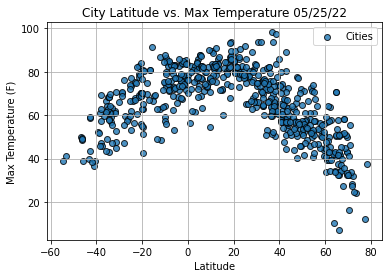

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.legend()

# Show plot.
plt.show()

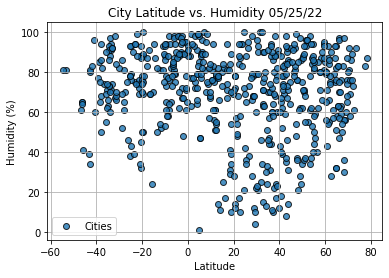

In [63]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.legend()

# Show plot.
plt.show()

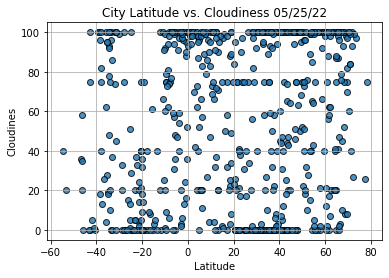

In [67]:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudines")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot.
plt.show()

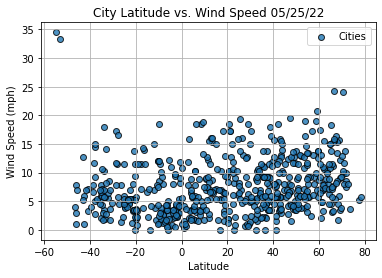

In [68]:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.legend()

# Show plot.
plt.show()

In [79]:
index13 = city_data_df.loc[13]
index13

City                     Bucerias
Country                        MX
Date          2022-05-26 02:27:07
Lat                         20.75
Lng                     -105.3333
Max Temp                    79.99
Humidity                       78
Cloudiness                      0
Wind Speed                  10.36
Name: 13, dtype: object

In [80]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
585     True
586     True
587     True
588     True
589    False
Name: Lat, Length: 590, dtype: bool

In [82]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ust-Ilimsk,RU,2022-05-26 02:27:02,58.0006,102.6619,50.27,87,100,9.31
2,Darhan,MN,2022-05-26 02:27:04,49.4867,105.9228,71.85,24,95,11.77
7,Tuktoyaktuk,CA,2022-05-26 02:27:06,69.4541,-133.0374,42.80,65,75,3.44
9,Yellowknife,CA,2022-05-26 02:23:57,62.4560,-114.3525,57.72,28,20,8.05
10,Mikkeli,FI,2022-05-26 02:27:07,61.6886,27.2723,50.11,66,0,6.91


In [83]:


 city_data_df.loc[(city_data_df["Lat"] < 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-05-26 02:27:02,-33.9258,18.4232,61.12,97,100,3.44
3,Luwuk,ID,2022-05-26 02:27:04,-0.9516,122.7875,85.62,71,95,4.23
4,Mar Del Plata,AR,2022-05-26 02:27:05,-38.0023,-57.5575,46.94,68,40,5.01
5,Punta Arenas,CL,2022-05-26 02:27:05,-53.1500,-70.9167,41.11,81,20,33.38
6,Carnarvon,AU,2022-05-26 02:27:05,-24.8667,113.6333,73.54,43,100,3.94


In [84]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

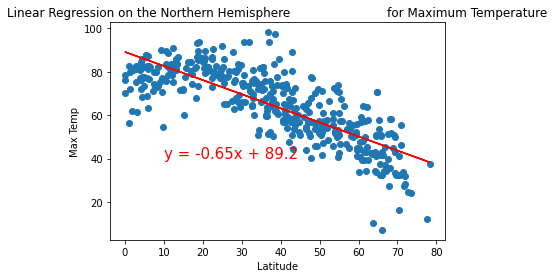

In [85]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

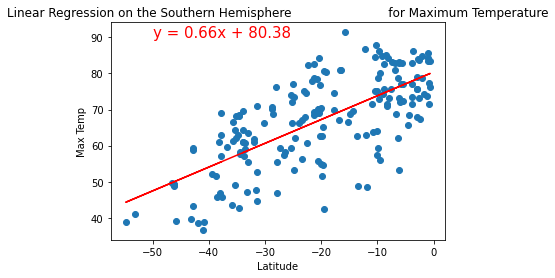

In [87]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

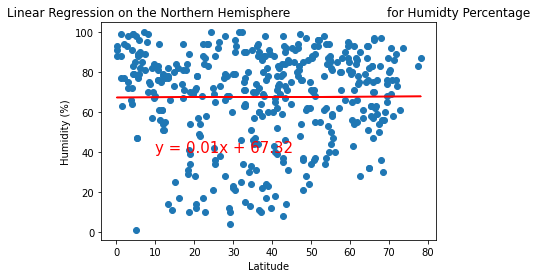

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidty Percentage', 'Humidity (%)',(10,40))

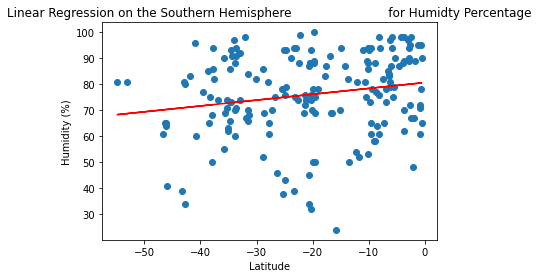

In [90]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidty Percentage', 'Humidity (%)',(-50,15))

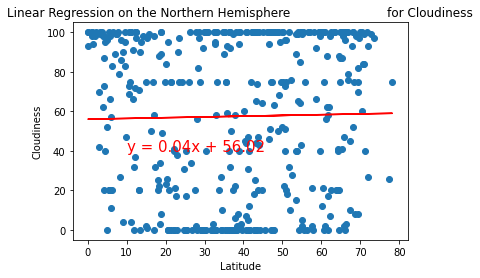

In [91]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(10,40))

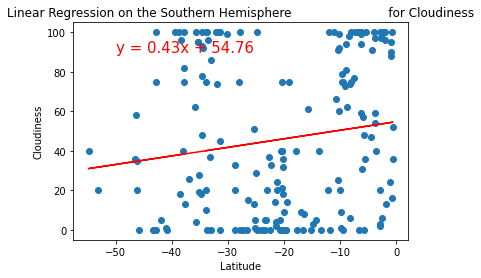

In [93]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Cloudiness', 'Cloudiness',(-50,90))

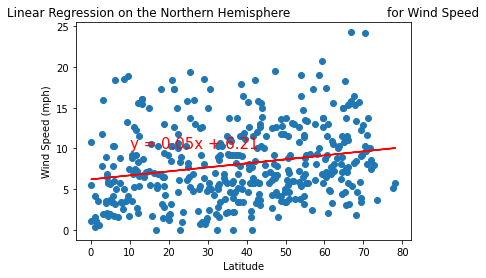

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(10,10))

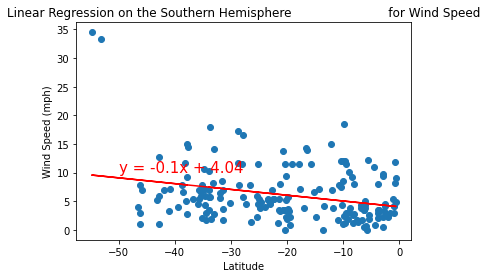

In [97]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-50,10))